In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.polynomial.polynomial import Polynomial

Kalyanbrata Chandra

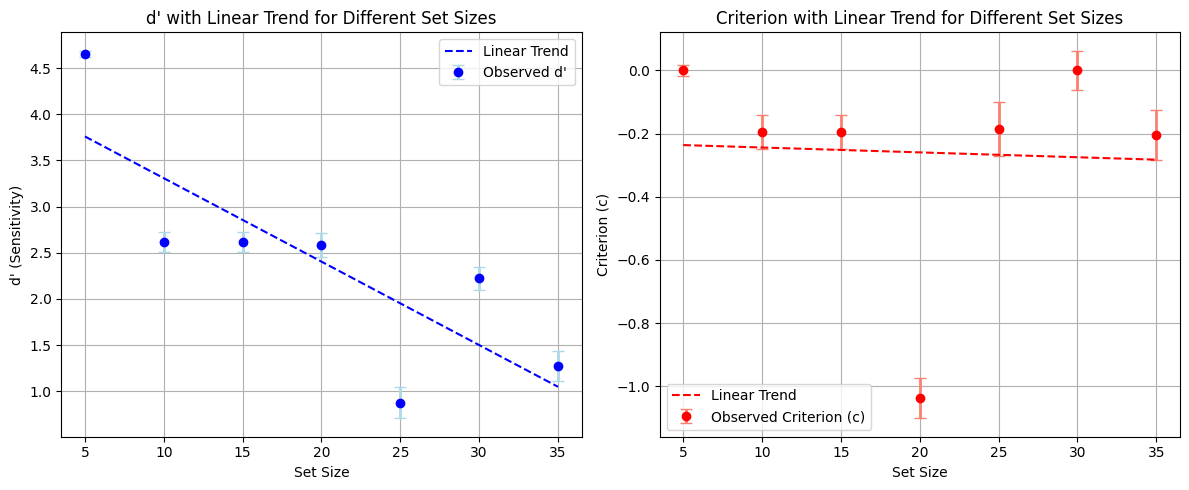

In [19]:
data_file_path = 'kalyanbrata_data.csv'  # Replace with your file path
experiment_data = pd.read_csv(data_file_path)

# Assume data is already loaded into 'experiment_data' DataFrame
# Sorted set sizes for consistent plotting
sorted_set_sizes = sorted(experiment_data['Set Size'].unique())

# Initialize lists to store d' and criterion values along with error calculations
d_prime_values = []
criterion_values = []
d_prime_errors = []
criterion_errors = []

# Loop through each set size to calculate d', criterion, and standard deviations for error bars
for set_size in sorted_set_sizes:
    # Filter data for the current set size
    set_data = experiment_data[experiment_data['Set Size'] == set_size]
    
    # Calculate hits, misses, false alarms, and correct rejections
    hits = set_data[(set_data['Is Target'] == True) & 
                    (set_data['Participant Response'] == 'Yes')].shape[0]
    misses = set_data[(set_data['Is Target'] == True) & 
                      (set_data['Participant Response'] == 'No')].shape[0]
    false_alarms = set_data[(set_data['Is Target'] == False) & 
                            (set_data['Participant Response'] == 'Yes')].shape[0]
    correct_rejections = set_data[(set_data['Is Target'] == False) & 
                                  (set_data['Participant Response'] == 'No')].shape[0]
    
    # Calculate hit rate and false alarm rate
    hit_rate = hits / (hits + misses) if (hits + misses) > 0 else 0
    false_alarm_rate = false_alarms / (false_alarms + correct_rejections) if (false_alarms + correct_rejections) > 0 else 0
    
    # Handle extreme rates by clipping to avoid issues with z-scores
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Calculate d' (sensitivity) and criterion (c) using z-scores
    z_hit = norm.ppf(hit_rate)
    z_false_alarm = norm.ppf(false_alarm_rate)
    d_prime = z_hit - z_false_alarm
    criterion = - (z_hit + z_false_alarm) / 2
    
    # Store calculated values
    d_prime_values.append(d_prime)
    criterion_values.append(criterion)
    
    # Estimate standard deviations for error bars (using binomial distribution as approximation)
    hit_std = np.sqrt(hit_rate * (1 - hit_rate) / (hits + misses)) if (hits + misses) > 0 else 0
    false_alarm_std = np.sqrt(false_alarm_rate * (1 - false_alarm_rate) / (false_alarms + correct_rejections)) if (false_alarms + correct_rejections) > 0 else 0
    
    # Calculate errors for d' and criterion using error propagation
    d_prime_error = np.sqrt(hit_std**2 + false_alarm_std**2)  # Combined error for d'
    criterion_error = np.sqrt(hit_std**2 + false_alarm_std**2) / 2  # Combined error for criterion
    
    d_prime_errors.append(d_prime_error)
    criterion_errors.append(criterion_error)

# Fit a linear model (degree 1 polynomial) for d' and criterion values
# Linear trend fitting to provide a smooth trend line
d_prime_linear = Polynomial.fit(sorted_set_sizes, d_prime_values, 1)
criterion_linear = Polynomial.fit(sorted_set_sizes, criterion_values, 1)

# Generate smooth x-values to plot the trend lines
smooth_set_sizes = np.linspace(min(sorted_set_sizes), max(sorted_set_sizes), 100)
d_prime_trend_linear = d_prime_linear(smooth_set_sizes)
criterion_trend_linear = criterion_linear(smooth_set_sizes)

# Begin plotting both d' and criterion values with linear trend lines
plt.figure(figsize=(12, 5))

# Plot for d' values with error bars and linear trend line
plt.subplot(1, 2, 1)
plt.errorbar(sorted_set_sizes, d_prime_values, yerr=d_prime_errors, fmt='o', color='b', 
             ecolor='lightblue', elinewidth=2, capsize=4, label="Observed d'")
plt.plot(smooth_set_sizes, d_prime_trend_linear, color='blue', linestyle='--', label="Linear Trend")
plt.xlabel('Set Size')
plt.ylabel("d' (Sensitivity)")
plt.title("d' with Linear Trend for Different Set Sizes")
plt.legend()
plt.grid(True)

# Plot for criterion (c) values with error bars and linear trend line
plt.subplot(1, 2, 2)
plt.errorbar(sorted_set_sizes, criterion_values, yerr=criterion_errors, fmt='o', color='r', 
             ecolor='salmon', elinewidth=2, capsize=4, label="Observed Criterion (c)")
plt.plot(smooth_set_sizes, criterion_trend_linear, color='red', linestyle='--', label="Linear Trend")
plt.xlabel('Set Size')
plt.ylabel('Criterion (c)')
plt.title('Criterion with Linear Trend for Different Set Sizes')
plt.legend()
plt.grid(True)

# Display both plots with proper layout
plt.tight_layout()
plt.show()

In [20]:
d_prime_list = [float("{:.2f}".format(i)) for i in d_prime_values]
criterion_list = [float("{:.2f}".format(i)) for i in criterion_values]
set_size_list = [int(i) for i in sorted_set_sizes]

print("Participant's name: Kalyanbrata Chandra")

for i in range(len(set_size_list)):
    print(f"For set size: {set_size_list[i]} the d' value is {d_prime_list[i]} and the criterion value is {criterion_list[i]}")


Participant's name: Kalyanbrata Chandra
For set size: 5 the d' value is 4.65 and the criterion value is -0.0
For set size: 10 the d' value is 2.61 and the criterion value is -0.2
For set size: 15 the d' value is 2.61 and the criterion value is -0.2
For set size: 20 the d' value is 2.58 and the criterion value is -1.04
For set size: 25 the d' value is 0.88 and the criterion value is -0.18
For set size: 30 the d' value is 2.22 and the criterion value is -0.0
For set size: 35 the d' value is 1.27 and the criterion value is -0.21


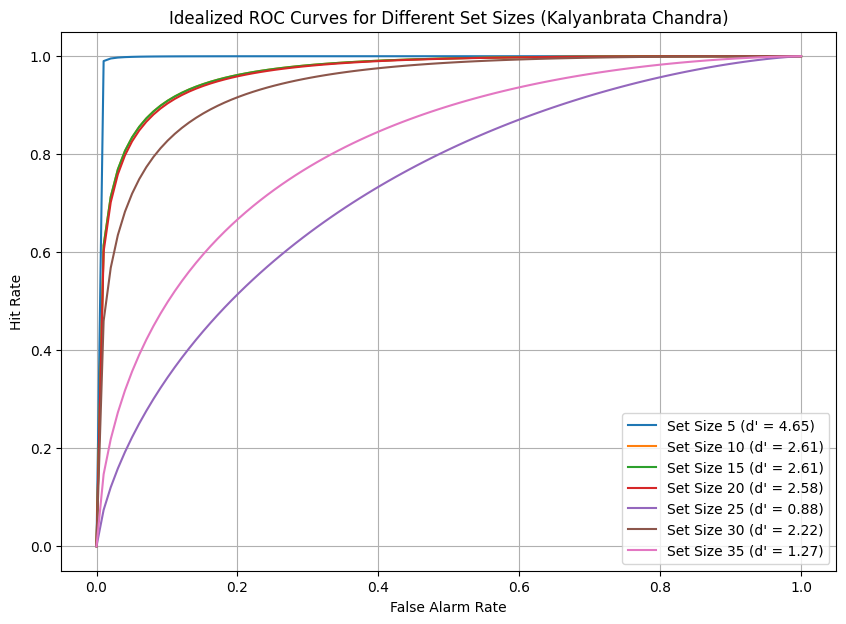

In [21]:
# Initialize the plot for ROC curves
plt.figure(figsize=(10, 7))

# Loop through each set size in sorted order to calculate d' and plot an ideal ROC curve
for set_size in sorted_set_sizes:
    # Filter data for the current set size
    set_data = experiment_data[experiment_data['Set Size'] == set_size]
    
    # Calculate hits, misses, false alarms, and correct rejections
    hits = set_data[(set_data['Is Target'] == True) & 
                    (set_data['Participant Response'] == 'Yes')].shape[0]
    misses = set_data[(set_data['Is Target'] == True) & 
                      (set_data['Participant Response'] == 'No')].shape[0]
    false_alarms = set_data[(set_data['Is Target'] == False) & 
                            (set_data['Participant Response'] == 'Yes')].shape[0]
    correct_rejections = set_data[(set_data['Is Target'] == False) & 
                                  (set_data['Participant Response'] == 'No')].shape[0]
    
    # Calculate hit rate and false alarm rate
    hit_rate = hits / (hits + misses) if (hits + misses) > 0 else 0
    false_alarm_rate = false_alarms / (false_alarms + correct_rejections) if (false_alarms + correct_rejections) > 0 else 0
    
    # To prevent extreme rates from producing undefined z-scores:
    # Adjust hit rate and false alarm rate if they are exactly 0 or 1.
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Calculate d' value for this set size
    d_prime = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)
    
    # Generate an idealized ROC curve based on d'
    # We use a range of false alarm rates from 0 to 1 to simulate an ideal ROC
    ideal_false_alarm_rates = np.linspace(0, 1, 100)
    ideal_hit_rates = norm.cdf(norm.ppf(ideal_false_alarm_rates) + d_prime)
    
    # Clip any NaN values or values outside [0, 1] for ideal_hit_rates to keep the ROC plot valid
    ideal_hit_rates = np.clip(ideal_hit_rates, 0, 1)
    
    # Plot the ideal ROC curve for this set size
    plt.plot(ideal_false_alarm_rates, ideal_hit_rates, label=f'Set Size {set_size} (d\' = {d_prime:.2f})')

# Plot formatting and labeling
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('Idealized ROC Curves for Different Set Sizes (Kalyanbrata Chandra)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Swarnim Sharma

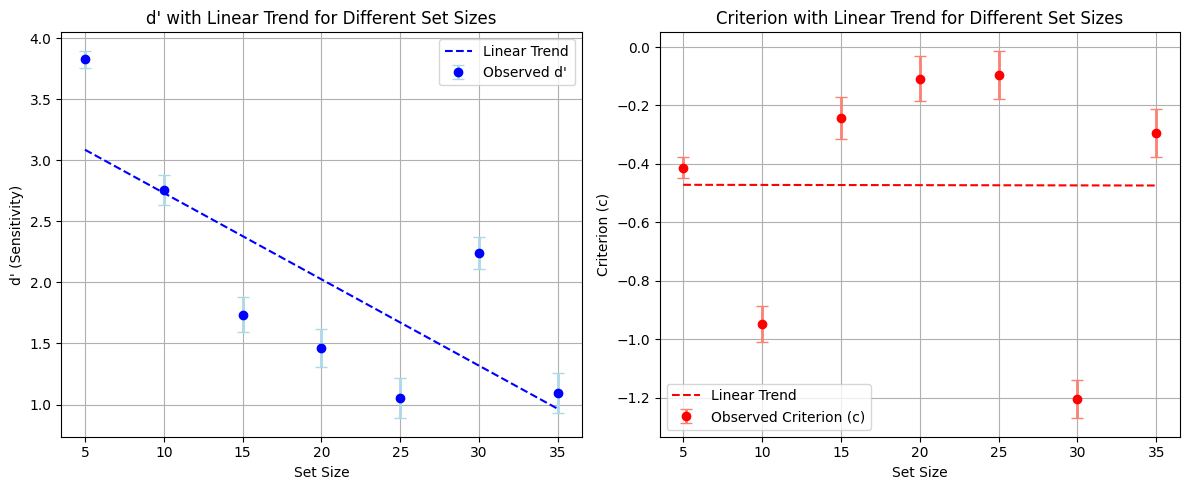

In [22]:
data_file_path = 'swarnim_data.csv'  # Replace with your file path
experiment_data = pd.read_csv(data_file_path)

# Assume data is already loaded into 'experiment_data' DataFrame
# Sorted set sizes for consistent plotting
sorted_set_sizes = sorted(experiment_data['Set Size'].unique())

# Initialize lists to store d' and criterion values along with error calculations
d_prime_values = []
criterion_values = []
d_prime_errors = []
criterion_errors = []

# Loop through each set size to calculate d', criterion, and standard deviations for error bars
for set_size in sorted_set_sizes:
    # Filter data for the current set size
    set_data = experiment_data[experiment_data['Set Size'] == set_size]
    
    # Calculate hits, misses, false alarms, and correct rejections
    hits = set_data[(set_data['Is Target'] == True) & 
                    (set_data['Participant Response'] == 'Yes')].shape[0]
    misses = set_data[(set_data['Is Target'] == True) & 
                      (set_data['Participant Response'] == 'No')].shape[0]
    false_alarms = set_data[(set_data['Is Target'] == False) & 
                            (set_data['Participant Response'] == 'Yes')].shape[0]
    correct_rejections = set_data[(set_data['Is Target'] == False) & 
                                  (set_data['Participant Response'] == 'No')].shape[0]
    
    # Calculate hit rate and false alarm rate
    hit_rate = hits / (hits + misses) if (hits + misses) > 0 else 0
    false_alarm_rate = false_alarms / (false_alarms + correct_rejections) if (false_alarms + correct_rejections) > 0 else 0
    
    # Handle extreme rates by clipping to avoid issues with z-scores
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Calculate d' (sensitivity) and criterion (c) using z-scores
    z_hit = norm.ppf(hit_rate)
    z_false_alarm = norm.ppf(false_alarm_rate)
    d_prime = z_hit - z_false_alarm
    criterion = - (z_hit + z_false_alarm) / 2
    
    # Store calculated values
    d_prime_values.append(d_prime)
    criterion_values.append(criterion)
    
    # Estimate standard deviations for error bars (using binomial distribution as approximation)
    hit_std = np.sqrt(hit_rate * (1 - hit_rate) / (hits + misses)) if (hits + misses) > 0 else 0
    false_alarm_std = np.sqrt(false_alarm_rate * (1 - false_alarm_rate) / (false_alarms + correct_rejections)) if (false_alarms + correct_rejections) > 0 else 0
    
    # Calculate errors for d' and criterion using error propagation
    d_prime_error = np.sqrt(hit_std**2 + false_alarm_std**2)  # Combined error for d'
    criterion_error = np.sqrt(hit_std**2 + false_alarm_std**2) / 2  # Combined error for criterion
    
    d_prime_errors.append(d_prime_error)
    criterion_errors.append(criterion_error)

# Fit a linear model (degree 1 polynomial) for d' and criterion values
# Linear trend fitting to provide a smooth trend line
d_prime_linear = Polynomial.fit(sorted_set_sizes, d_prime_values, 1)
criterion_linear = Polynomial.fit(sorted_set_sizes, criterion_values, 1)

# Generate smooth x-values to plot the trend lines
smooth_set_sizes = np.linspace(min(sorted_set_sizes), max(sorted_set_sizes), 100)
d_prime_trend_linear = d_prime_linear(smooth_set_sizes)
criterion_trend_linear = criterion_linear(smooth_set_sizes)

# Begin plotting both d' and criterion values with linear trend lines
plt.figure(figsize=(12, 5))

# Plot for d' values with error bars and linear trend line
plt.subplot(1, 2, 1)
plt.errorbar(sorted_set_sizes, d_prime_values, yerr=d_prime_errors, fmt='o', color='b', 
             ecolor='lightblue', elinewidth=2, capsize=4, label="Observed d'")
plt.plot(smooth_set_sizes, d_prime_trend_linear, color='blue', linestyle='--', label="Linear Trend")
plt.xlabel('Set Size')
plt.ylabel("d' (Sensitivity)")
plt.title("d' with Linear Trend for Different Set Sizes")
plt.legend()
plt.grid(True)

# Plot for criterion (c) values with error bars and linear trend line
plt.subplot(1, 2, 2)
plt.errorbar(sorted_set_sizes, criterion_values, yerr=criterion_errors, fmt='o', color='r', 
             ecolor='salmon', elinewidth=2, capsize=4, label="Observed Criterion (c)")
plt.plot(smooth_set_sizes, criterion_trend_linear, color='red', linestyle='--', label="Linear Trend")
plt.xlabel('Set Size')
plt.ylabel('Criterion (c)')
plt.title('Criterion with Linear Trend for Different Set Sizes')
plt.legend()
plt.grid(True)

# Display both plots with proper layout
plt.tight_layout()
plt.show()

In [23]:
d_prime_list = [float("{:.2f}".format(i)) for i in d_prime_values]
criterion_list = [float("{:.2f}".format(i)) for i in criterion_values]
set_size_list = [int(i) for i in sorted_set_sizes]

print("Participant's name: Swarnim Sharma")

for i in range(len(set_size_list)):
    print(f"For set size: {set_size_list[i]} the d' value is {d_prime_list[i]} and the criterion value is {criterion_list[i]}")


Participant's name: Swarnim Sharma
For set size: 5 the d' value is 3.83 and the criterion value is -0.41
For set size: 10 the d' value is 2.76 and the criterion value is -0.95
For set size: 15 the d' value is 1.73 and the criterion value is -0.24
For set size: 20 the d' value is 1.46 and the criterion value is -0.11
For set size: 25 the d' value is 1.05 and the criterion value is -0.1
For set size: 30 the d' value is 2.24 and the criterion value is -1.2
For set size: 35 the d' value is 1.09 and the criterion value is -0.29


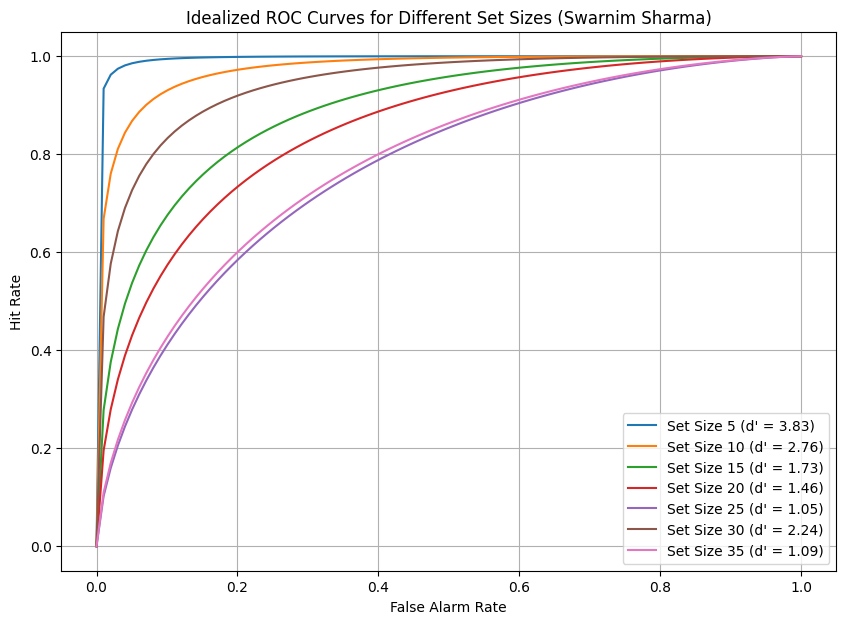

In [24]:
# Initialize the plot for ROC curves
plt.figure(figsize=(10, 7))

# Loop through each set size in sorted order to calculate d' and plot an ideal ROC curve
for set_size in sorted_set_sizes:
    # Filter data for the current set size
    set_data = experiment_data[experiment_data['Set Size'] == set_size]
    
    # Calculate hits, misses, false alarms, and correct rejections
    hits = set_data[(set_data['Is Target'] == True) & 
                    (set_data['Participant Response'] == 'Yes')].shape[0]
    misses = set_data[(set_data['Is Target'] == True) & 
                      (set_data['Participant Response'] == 'No')].shape[0]
    false_alarms = set_data[(set_data['Is Target'] == False) & 
                            (set_data['Participant Response'] == 'Yes')].shape[0]
    correct_rejections = set_data[(set_data['Is Target'] == False) & 
                                  (set_data['Participant Response'] == 'No')].shape[0]
    
    # Calculate hit rate and false alarm rate
    hit_rate = hits / (hits + misses) if (hits + misses) > 0 else 0
    false_alarm_rate = false_alarms / (false_alarms + correct_rejections) if (false_alarms + correct_rejections) > 0 else 0
    
    # To prevent extreme rates from producing undefined z-scores:
    # Adjust hit rate and false alarm rate if they are exactly 0 or 1.
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Calculate d' value for this set size
    d_prime = norm.ppf(hit_rate) - norm.ppf(false_alarm_rate)
    
    # Generate an idealized ROC curve based on d'
    # We use a range of false alarm rates from 0 to 1 to simulate an ideal ROC
    ideal_false_alarm_rates = np.linspace(0, 1, 100)
    ideal_hit_rates = norm.cdf(norm.ppf(ideal_false_alarm_rates) + d_prime)
    
    # Clip any NaN values or values outside [0, 1] for ideal_hit_rates to keep the ROC plot valid
    ideal_hit_rates = np.clip(ideal_hit_rates, 0, 1)
    
    # Plot the ideal ROC curve for this set size
    plt.plot(ideal_false_alarm_rates, ideal_hit_rates, label=f'Set Size {set_size} (d\' = {d_prime:.2f})')

# Plot formatting and labeling
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('Idealized ROC Curves for Different Set Sizes (Swarnim Sharma)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()